In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# remove pandas column count limit
pd.set_option('display.max_columns', None)

In [2]:
# Select the features for correlation matrix
selected_features = ['id','deviceid','trip_id','speed','acceleration','radial_acceleration','distance_from_start','acceleration_der','bus_stop','time']


In [3]:
data = pd.read_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration_and_distance_and_accDiff.csv')


In [4]:
# get my data trip id == 4890
data[data['trip_id']==2370]

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,count,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
241177,560490033,123,2021-10-01 09:11:27,7.293137,80.635765,0.00000,2021-10-01,09:11:27,POINT (184767.5840368192 232327.72943514792),NaN,2370.0,1,166,-0.415352,0.000000,0.000000,NaN,NaN,0.000000
241178,560490215,123,2021-10-01 09:11:33,7.293133,80.635833,2.69978,2021-10-01,09:11:33,POINT (184775.1252810224 232327.36224222518),NaN,2370.0,1,166,0.449963,0.016224,7.542102,0 days 00:00:06,0.865315,0.144219
241179,560491463,123,2021-10-01 09:11:48,7.293137,80.636227,5.39957,2021-10-01,09:11:48,POINT (184818.55166502894 232327.71411012457),NaN,2370.0,1,166,0.179986,0.012674,50.922804,0 days 00:00:15,-0.269977,-0.017998
241180,560491462,123,2021-10-01 09:12:03,7.293127,80.636852,7.55940,2021-10-01,09:12:03,POINT (184887.56079506013 232326.58761884997),NaN,2370.0,1,166,0.143989,0.058331,119.866348,0 days 00:00:15,-0.035997,-0.002400
241181,560491461,123,2021-10-01 09:12:10,7.293105,80.637165,8.09935,2021-10-01,09:12:10,POINT (184922.16418700397 232324.18871084476),NaN,2370.0,1,166,0.077136,0.088413,154.516247,0 days 00:00:07,-0.066853,-0.009550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241330,560581944,123,2021-10-01 10:00:35,7.297490,80.732497,1.07991,2021-10-01,10:00:35,POINT (195448.24314158212 232807.06548572614),NaN,2370.0,1,166,-0.031984,0.000039,14186.677147,0 days 00:09:34,0.076003,0.000132
241331,560582101,123,2021-10-01 10:00:39,7.297607,80.732742,3.77970,2021-10-01,10:00:39,POINT (195475.29563535625 232819.95702541425),NaN,2370.0,1,166,0.674948,0.268127,14216.648682,0 days 00:00:04,0.706931,0.176733
241332,560582104,123,2021-10-01 10:00:40,7.297657,80.732790,4.31966,2021-10-01,10:00:40,POINT (195480.64013873175 232825.48567381437),NaN,2370.0,1,166,0.539960,0.069841,14224.356314,0 days 00:00:01,-0.134988,-0.134988
241333,560583598,123,2021-10-01 10:00:55,7.298780,80.733387,11.87910,2021-10-01,10:00:55,POINT (195546.52353877638 232949.69701646626),NaN,2370.0,1,166,0.503963,0.672795,14365.534053,0 days 00:00:15,-0.035997,-0.002400


In [5]:
# set Nan in bus_stop to 0
data['bus_stop']=data['bus_stop'].fillna(0)
data_copy=data.copy()
data_copy=data_copy[selected_features]

In [6]:
# get the number of unique trip ids
unique_trip_ids = data_copy['trip_id'].unique()
len(unique_trip_ids)

13574

In [7]:
# print a list of unique trip ids
trip_ids = data_copy['trip_id'].unique()
# convert the list values to int
trip_ids = [int(x) for x in trip_ids]
print('unique trip ids: {}'.format(trip_ids))
# print length
print('length of unique trip ids: {}'.format(len(trip_ids)))

unique trip ids: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420, 422, 424, 426, 428, 430, 432, 434

In [8]:
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,count,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
0,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),0,2.0,1,207,0.323975,0.000000,0.000000,NaN,NaN,0.000000
1,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),0,2.0,1,207,-0.251980,1.278067,123.738485,0 days 00:00:15,-0.575955,-0.038397
2,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),0,2.0,1,207,-0.179987,0.722300,163.044397,0 days 00:00:15,0.071993,0.004800
3,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),0,2.0,1,207,-0.251980,0.048332,211.472339,0 days 00:00:15,-0.071993,-0.004800
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,207,0.359971,1.052222,287.492821,0 days 00:00:15,0.611951,0.040797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034419,898915939,1719,2022-02-25 16:47:53,7.291572,80.635452,2.15983,2022-02-25,16:47:53,POINT (184732.927692229 232154.67833579454),0,15890.0,2,1561,0.215983,0.714925,16242.694984,0 days 00:00:10,2.105833,0.210583
4034420,898916182,1719,2022-02-25 16:47:57,7.291587,80.635355,2.15983,2022-02-25,16:47:57,POINT (184722.26205350138 232156.3402929157),0,15890.0,2,1561,0.000000,0.003500,16253.479312,0 days 00:00:04,-0.215983,-0.053996
4034421,898917152,1719,2022-02-25 16:48:02,7.291597,80.635293,3.77970,2022-02-25,16:48:02,POINT (184715.44974995626 232157.44817551947),0,15890.0,2,1561,0.323974,1.320196,16260.374802,0 days 00:00:05,0.323974,0.064795
4034422,898917150,1719,2022-02-25 16:48:03,7.291605,80.635280,3.77970,2022-02-25,16:48:03,POINT (184713.9815042613 232158.37751184579),0,15890.0,2,1561,0.000000,0.128080,16262.113859,0 days 00:00:01,-0.323974,-0.323974


In [9]:
data_copy

,id,deviceid,trip_id,speed,acceleration,radial_acceleration,distance_from_start,acceleration_der,bus_stop,time
0,574733099,116,2.0,14.03890,0.323975,0.000000,0.000000,0.000000,0,08:03:19
1,574733100,116,2.0,10.25920,-0.251980,1.278067,123.738485,-0.038397,0,08:03:34
2,574733101,116,2.0,7.55940,-0.179987,0.722300,163.044397,0.004800,0,08:03:49
3,574733102,116,2.0,3.77970,-0.251980,0.048332,211.472339,-0.004800,0,08:04:04
4,574736662,116,2.0,9.17927,0.359971,1.052222,287.492821,0.040797,101,08:04:19
...,...,...,...,...,...,...,...,...,...,...
4034419,898915939,1719,15890.0,2.15983,0.215983,0.714925,16242.694984,0.210583,0,16:47:53
4034420,898916182,1719,15890.0,2.15983,0.000000,0.003500,16253.479312,-0.053996,0,16:47:57
4034421,898917152,1719,15890.0,3.77970,0.323974,1.320196,16260.374802,0.064795,0,16:48:02
4034422,898917150,1719,15890.0,3.77970,0.000000,0.128080,16262.113859,-0.323974,0,16:48:03


In [10]:
# read csv Data Sets\bus_stops_and_terminals_654.csv
bus_stops = pd.read_csv('../Data Sets/bus_stops_and_terminals_654.csv')
# get the list of stop ids where direction is 'Kandy-Digana'
bus_stops_kandy_digana = bus_stops[bus_stops['direction']=='Kandy-Digana']['stop_id'].unique()
bus_stops_kandy_digana

array(['BT01', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', 'BT02'], dtype=object)

In [11]:
# The code is iterating over unique values of the 'trip_id' column in the 'data_copy' DataFrame. For each unique trip_id, it creates a new DataFrame 'df' containing only the rows with that trip_id.
# for x in data_copy.trip_id.unique():
#     df = data_copy[data_copy['trip_id'] == x]
#     prev_stop = -1
#     current_stop = 0
#     segment = 1
    
#     for index, row in df.iterrows():
#         current_stop = row['bus_stop']
#         if current_stop != prev_stop:
#             if prev_stop == -1 and current_stop==0:
#                 segment=1
#                 data_copy.loc[index, 'segment'] = segment
#             elif prev_stop == -1:
#                 data_copy.loc[index, 'segment'] = 0
#                 if current_stop=='BT01':
#                     segment=1
#                 elif current_stop=='BT02':
#                     segment=16
#                 else:
#                     segment=(int(current_stop)-100)+1
#             elif current_stop!=0:   
#                 if current_stop=='BT01':
#                     segment=1
#                 elif current_stop=='BT02':
#                     segment=16
#                 else:
#                     segment=(int(current_stop)-100)+1
#                 data_copy.loc[index, 'segment'] = segment
#             elif current_stop==0:
#                 data_copy.loc[index, 'segment'] = segment
#         elif current_stop==0:
#                 data_copy.loc[index, 'segment'] = segment
#         elif current_stop!=0:
#                 data_copy.loc[index, 'segment'] = 0
#         prev_stop = current_stop
                
                
        

In [12]:
ayyas_df = pd.read_csv('../DataOut/bus_running_times_feature_added_all_moddedDF.csv')

In [13]:
ayyas_df

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1)
0,4890.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,0 days 00:01:09,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
1,4890.0,262.0,1.0,2.0,2021-10-01,06:42:12,06:45:42,0 days 00:03:30,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,74.0
2,4890.0,262.0,1.0,3.0,2021-10-01,06:45:42,06:53:58,0 days 00:08:16,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
3,4890.0,262.0,1.0,4.0,2021-10-01,06:54:04,06:57:19,0 days 00:03:15,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,6.0
4,4890.0,262.0,1.0,5.0,2021-10-01,06:57:19,06:58:56,0 days 00:01:37,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197627,3462.0,123.0,2.0,28.0,2022-10-31,18:45:44,18:47:23,0:01:39,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,9.0
197628,3462.0,123.0,2.0,29.0,2022-10-31,18:47:38,18:50:23,0:02:45,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0
197629,3462.0,123.0,2.0,30.0,2022-10-31,18:50:56,18:56:33,0:05:37,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,33.0
197630,3462.0,123.0,2.0,31.0,2022-10-31,18:56:48,18:57:34,0:00:46,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0


In [14]:
ayyas_df[ayyas_df['trip_id']==2]

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1)
2877,2.0,116.0,1.0,1.0,2021-10-16,08:03:04,08:04:49,0 days 00:01:45,105.0,0.6261,5.0,8.00,0.0,1,0,3.0,102.0,102.0,102.0,87.0,102.0,102.0,102.0,102.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",0.0
2878,2.0,116.0,1.0,2.0,2021-10-16,08:05:34,08:09:04,0 days 00:03:30,210.0,1.2808,5.0,8.00,0.0,1,0,3.0,249.0,249.0,249.0,222.0,249.0,105.0,249.0,249.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",45.0
2879,2.0,116.0,1.0,3.0,2021-10-16,08:09:04,08:16:15,0 days 00:07:11,431.0,2.1125,5.0,8.00,0.0,1,0,3.0,416.0,416.0,416.0,392.0,416.0,210.0,105.0,416.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",0.0
2880,2.0,116.0,1.0,4.0,2021-10-16,08:16:15,08:20:36,0 days 00:04:21,261.0,1.5513,5.0,8.25,0.0,1,0,3.0,206.0,206.0,206.0,198.0,206.0,431.0,210.0,105.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",0.0
2881,2.0,116.0,1.0,5.0,2021-10-16,08:20:36,08:22:21,0 days 00:01:45,105.0,0.8450,5.0,8.25,0.0,1,0,3.0,132.0,132.0,132.0,138.0,132.0,261.0,431.0,210.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",0.0
2882,2.0,116.0,1.0,6.0,2021-10-16,08:22:21,08:26:57,0 days 00:04:36,276.0,1.3125,5.0,8.25,0.0,1,0,3.0,201.0,201.0,201.0,181.0,201.0,105.0,261.0,431.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",0.0
2883,2.0,116.0,1.0,7.0,2021-10-16,08:27:57,08:28:57,0 days 00:01:00,60.0,0.3713,5.0,8.25,0.0,1,0,3.0,47.0,47.0,47.0,39.0,47.0,276.0,105.0,261.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",60.0
2884,2.0,116.0,1.0,8.0,2021-10-16,08:29:27,08:30:27,0 days 00:01:00,60.0,0.6245,5.0,8.25,0.0,1,0,3.0,78.0,78.0,78.0,60.0,78.0,60.0,276.0,105.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",30.0
2885,2.0,116.0,1.0,9.0,2021-10-16,08:30:27,08:31:12,0 days 00:00:45,45.0,0.2572,5.0,8.50,0.0,1,0,3.0,34.0,34.0,34.0,17.0,34.0,60.0,60.0,276.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",0.0
2886,2.0,116.0,1.0,10.0,2021-10-16,08:33:27,08:36:57,0 days 00:03:30,210.0,1.2349,5.0,8.50,0.0,1,0,3.0,164.0,164.0,164.0,124.0,164.0,45.0,60.0,60.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",135.0


In [15]:

# data_copy['segment'] = 0
# for x in data_copy.trip_id.unique():
#     df = data_copy[data_copy['trip_id'] == x]
#     ayyas_tid_df = ayyas_df[ayyas_df['trip_id'] == x]

#     for index, row in df.iterrows():
#         for index2, row2 in ayyas_tid_df.iterrows():
#             # print(row)
#             print_counter = 0
#             # Check if 'start_time' and 'end_time' are not null (not missing values)
#             if pd.notna(row2['start_time']) and pd.notna(row2['end_time']):
#                 if row2['start_time'] <= row['time'] and row['time'] <= row2['end_time']:
#                     data_copy.loc[index, 'segment'] = row2['segment']
#                     break
                        


In [50]:
# save the data_copy to a csv file
# data_copy.to_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration_and_distance_and_accDiff_and_segment.csv', index=False)

# read the csv file
data_copy = pd.read_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration_and_distance_and_accDiff_and_segment.csv')

In [16]:


# print all rows of bus_trip_speed_and_other_features where trip id is 3462
# ignore the raw limitation of panda for this cell
# pd.set_option('display.max_rows', None)
data_copy[data_copy['trip_id']==2].head(25)


,id,deviceid,trip_id,speed,acceleration,radial_acceleration,distance_from_start,acceleration_der,bus_stop,time,segment
0,574733099,116,2.0,14.03890,0.323975,0.000000,0.000000,0.000000,0,08:03:19,1
1,574733100,116,2.0,10.25920,-0.251980,1.278067,123.738485,-0.038397,0,08:03:34,1
2,574733101,116,2.0,7.55940,-0.179987,0.722300,163.044397,0.004800,0,08:03:49,1
3,574733102,116,2.0,3.77970,-0.251980,0.048332,211.472339,-0.004800,0,08:04:04,1
4,574736662,116,2.0,9.17927,0.359971,1.052222,287.492821,0.040797,101,08:04:19,1
5,574736663,116,2.0,8.63931,-0.035997,0.639311,343.141212,-0.026398,101,08:04:34,1
6,574736664,116,2.0,0.00000,-0.575954,0.000000,400.646939,-0.035997,101,08:04:49,1
7,574736665,116,2.0,0.00000,0.000000,0.000000,401.021945,0.038397,101,08:05:04,0
8,574736666,116,2.0,0.00000,0.000000,0.000000,401.021945,0.000000,101,08:05:19,0
9,574736667,116,2.0,6.47948,0.431965,0.333808,427.897272,0.028798,101,08:05:34,2


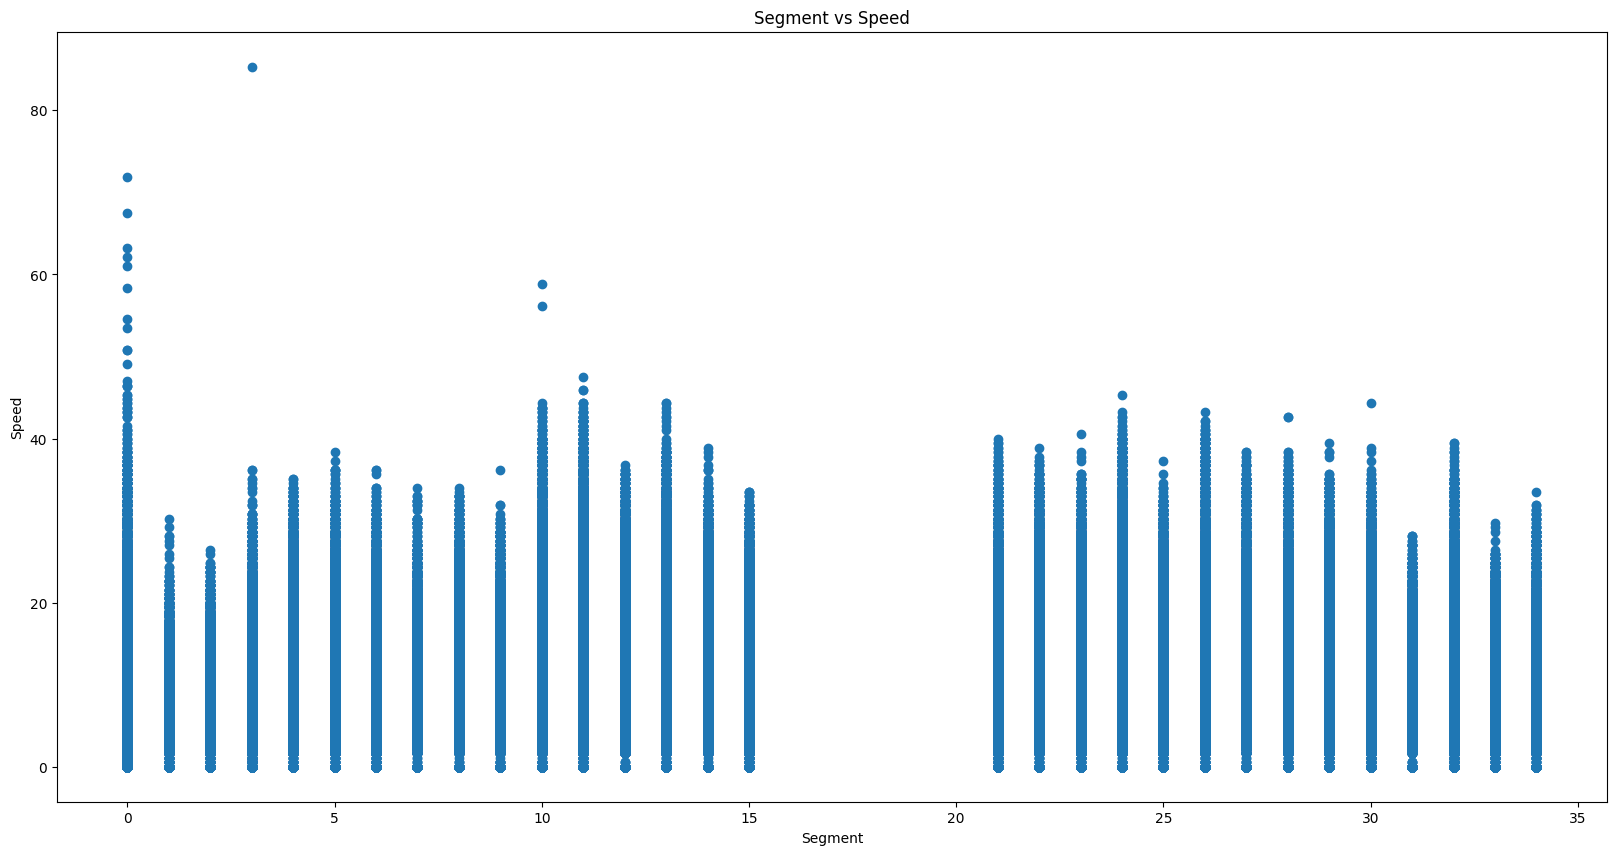

In [17]:
# draw a dot plot for segment vs speed
plt.figure(figsize=(20,10))
plt.scatter(data_copy['segment'], data_copy['speed'])
plt.xlabel('Segment')
plt.ylabel('Speed')
plt.title('Segment vs Speed')
plt.show()

In [18]:
# print the number of unique bus stops per each trip id in the data set
# data_copy.groupby('trip_id')['bus_stop'].nunique()
# print the trip ids and the number of unique bus stops for the trip ids with the number of unique bus stops different from 16
data_copy.groupby('trip_id')['bus_stop'].nunique().reset_index(name='count').query('count != 16')

,trip_id,count
0,1.0,15
2,3.0,15
4,5.0,15
6,7.0,15
8,9.0,15
...,...,...
13565,15883.0,15
13567,15885.0,15
13568,15886.0,15
13570,15888.0,15


In [19]:
data_copy

,id,deviceid,trip_id,speed,acceleration,radial_acceleration,distance_from_start,acceleration_der,bus_stop,time,segment
0,574733099,116,2.0,14.03890,0.323975,0.000000,0.000000,0.000000,0,08:03:19,1
1,574733100,116,2.0,10.25920,-0.251980,1.278067,123.738485,-0.038397,0,08:03:34,1
2,574733101,116,2.0,7.55940,-0.179987,0.722300,163.044397,0.004800,0,08:03:49,1
3,574733102,116,2.0,3.77970,-0.251980,0.048332,211.472339,-0.004800,0,08:04:04,1
4,574736662,116,2.0,9.17927,0.359971,1.052222,287.492821,0.040797,101,08:04:19,1
...,...,...,...,...,...,...,...,...,...,...,...
4034419,898915939,1719,15890.0,2.15983,0.215983,0.714925,16242.694984,0.210583,0,16:47:53,0
4034420,898916182,1719,15890.0,2.15983,0.000000,0.003500,16253.479312,-0.053996,0,16:47:57,0
4034421,898917152,1719,15890.0,3.77970,0.323974,1.320196,16260.374802,0.064795,0,16:48:02,0
4034422,898917150,1719,15890.0,3.77970,0.000000,0.128080,16262.113859,-0.323974,0,16:48:03,0


In [20]:
df_for_segment_avg=data_copy[data_copy['segment']!=0]
# drop the columns that are not needed
df_for_segment_avg=df_for_segment_avg.drop(columns=['distance_from_start','bus_stop','id'])

df_for_busstop_avg=data_copy[data_copy['bus_stop']!=0]
# drop the columns that are not needed
df_for_busstop_avg=df_for_busstop_avg.drop(columns=['distance_from_start','segment','id'])

In [21]:
df_for_segment_avg.head(25)

,deviceid,trip_id,speed,acceleration,radial_acceleration,acceleration_der,time,segment
0,116,2.0,14.03890,0.323975,0.000000,0.000000,08:03:19,1
1,116,2.0,10.25920,-0.251980,1.278067,-0.038397,08:03:34,1
2,116,2.0,7.55940,-0.179987,0.722300,0.004800,08:03:49,1
3,116,2.0,3.77970,-0.251980,0.048332,-0.004800,08:04:04,1
4,116,2.0,9.17927,0.359971,1.052222,0.040797,08:04:19,1
5,116,2.0,8.63931,-0.035997,0.639311,-0.026398,08:04:34,1
6,116,2.0,0.00000,-0.575954,0.000000,-0.035997,08:04:49,1
9,116,2.0,6.47948,0.431965,0.333808,0.028798,08:05:34,2
10,116,2.0,9.17927,0.179986,0.546434,-0.016799,08:05:49,2
11,116,2.0,8.63931,-0.035997,0.096457,-0.014399,08:06:04,2


In [22]:
# get the unique values in segment column
data_copy['segment'].unique()

array([ 1,  0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], dtype=int64)

In [23]:
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,count,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
0,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),0,2.0,1,207,0.323975,0.000000,0.000000,NaN,NaN,0.000000
1,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),0,2.0,1,207,-0.251980,1.278067,123.738485,0 days 00:00:15,-0.575955,-0.038397
2,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),0,2.0,1,207,-0.179987,0.722300,163.044397,0 days 00:00:15,0.071993,0.004800
3,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),0,2.0,1,207,-0.251980,0.048332,211.472339,0 days 00:00:15,-0.071993,-0.004800
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,207,0.359971,1.052222,287.492821,0 days 00:00:15,0.611951,0.040797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034419,898915939,1719,2022-02-25 16:47:53,7.291572,80.635452,2.15983,2022-02-25,16:47:53,POINT (184732.927692229 232154.67833579454),0,15890.0,2,1561,0.215983,0.714925,16242.694984,0 days 00:00:10,2.105833,0.210583
4034420,898916182,1719,2022-02-25 16:47:57,7.291587,80.635355,2.15983,2022-02-25,16:47:57,POINT (184722.26205350138 232156.3402929157),0,15890.0,2,1561,0.000000,0.003500,16253.479312,0 days 00:00:04,-0.215983,-0.053996
4034421,898917152,1719,2022-02-25 16:48:02,7.291597,80.635293,3.77970,2022-02-25,16:48:02,POINT (184715.44974995626 232157.44817551947),0,15890.0,2,1561,0.323974,1.320196,16260.374802,0 days 00:00:05,0.323974,0.064795
4034422,898917150,1719,2022-02-25 16:48:03,7.291605,80.635280,3.77970,2022-02-25,16:48:03,POINT (184713.9815042613 232158.37751184579),0,15890.0,2,1561,0.000000,0.128080,16262.113859,0 days 00:00:01,-0.323974,-0.323974


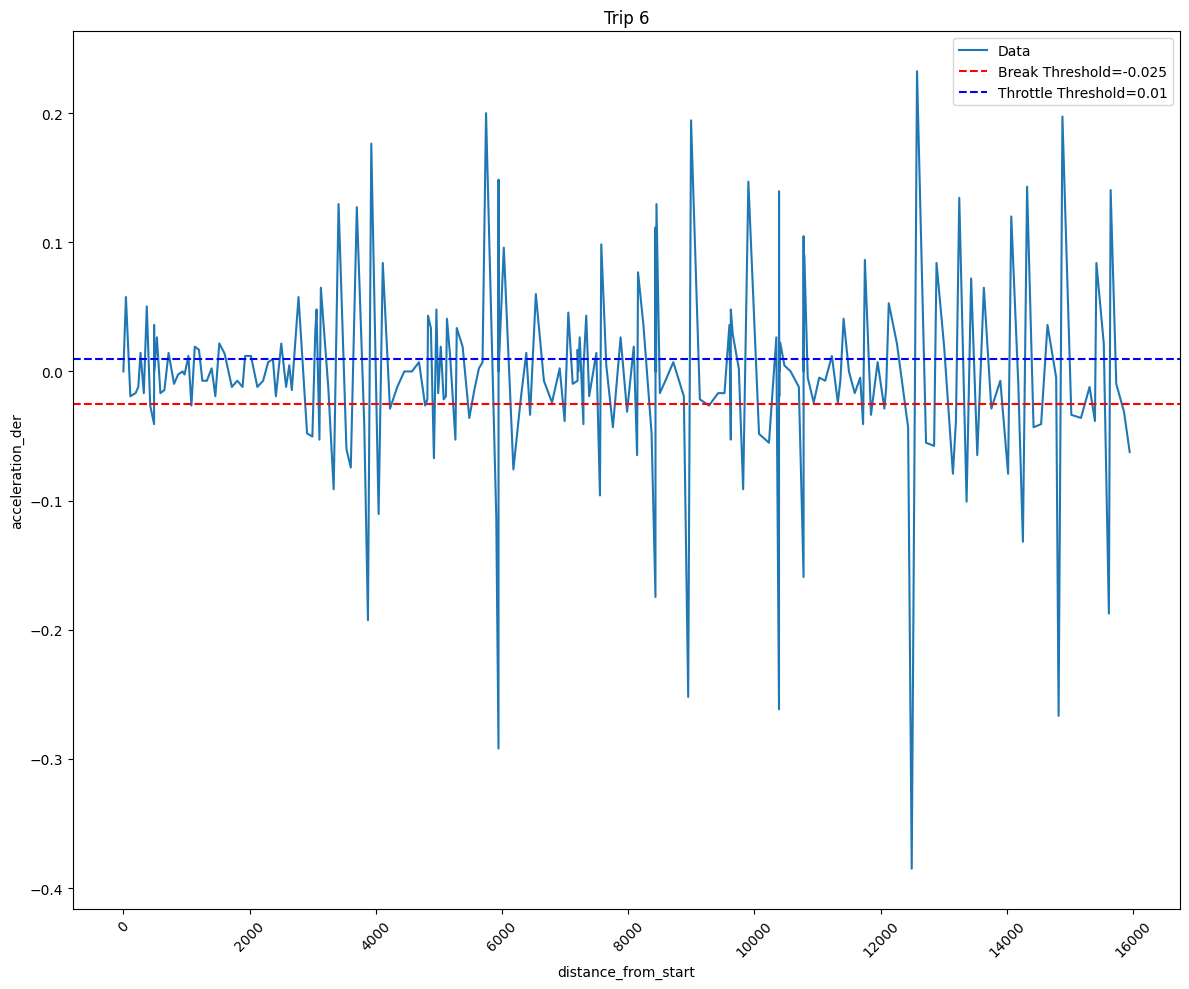

In [24]:
import matplotlib.pyplot as plt

columnx = 'distance_from_start'
columny = 'acceleration_der'
trip_id = 6

# Assuming 'data' is your DataFrame
df1 = data[(data['trip_id'] == 4)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the data
ax.plot(df1[f"{columnx}"], df1[f"{columny}"], label='Data')
ax.set_xlabel(f"{columnx}")
ax.set_ylabel(f"{columny}")
ax.set_title("Trip " + str(trip_id))
ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Add a horizontal line at the desired y-value (e.g., y=0)
horizontal_line_y = -0.025  # Change this to the desired y-value
ax.axhline(horizontal_line_y, color='red', linestyle='--', label=f'Break Threshold={horizontal_line_y}')

# Add a horizontal line at the desired y-value (e.g., y=0)
horizontal_line_x = 0.01  # Change this to the desired y-value
ax.axhline(horizontal_line_x, color='blue', linestyle='--', label=f'Throttle Threshold={horizontal_line_x}')

# Add a legend to the plot
ax.legend()

# Adjust layout for better formatting
plt.tight_layout()

# Show the plot
plt.show()


In [25]:
# take the mean of each feature grouped buy the deviceid and segment

# List of features you want to calculate the mean for
features_to_mean = ['deviceid','speed', 'acceleration', 'radial_acceleration']  # Replace with your actual feature names

# Group by 'deviceid' and 'segment', then calculate the mean for each feature
means = data_copy.groupby(['trip_id', 'segment'])[features_to_mean].mean().reset_index()

# The 'means' DataFrame now contains the mean values for each feature, grouped by 'deviceid' and 'segment'
print(means)

        trip_id  segment  deviceid      speed  acceleration  \
0           1.0        0     116.0   1.208475      0.070280   
1           1.0       21     116.0  14.518853     -0.189485   
2           1.0       22     116.0  20.698367     -0.391683   
3           1.0       23     116.0  12.222668      0.000099   
4           1.0       24     116.0   9.584235      0.008999   
...         ...      ...       ...        ...           ...   
207381  15891.0       11    1719.0  18.699291     -0.152594   
207382  15891.0       12    1719.0  16.473428     -0.152041   
207383  15891.0       13    1719.0  17.021033     -0.189728   
207384  15891.0       14    1719.0  10.994308     -0.172396   
207385  15891.0       15    1719.0  13.151207     -0.080991   

        radial_acceleration  
0                  0.017025  
1                  1.359669  
2                  1.134855  
3                  0.487629  
4                  0.471313  
...                     ...  
207381             3.907671  
207

In [26]:
data_copy

,id,deviceid,trip_id,speed,acceleration,radial_acceleration,distance_from_start,acceleration_der,bus_stop,time,segment
0,574733099,116,2.0,14.03890,0.323975,0.000000,0.000000,0.000000,0,08:03:19,1
1,574733100,116,2.0,10.25920,-0.251980,1.278067,123.738485,-0.038397,0,08:03:34,1
2,574733101,116,2.0,7.55940,-0.179987,0.722300,163.044397,0.004800,0,08:03:49,1
3,574733102,116,2.0,3.77970,-0.251980,0.048332,211.472339,-0.004800,0,08:04:04,1
4,574736662,116,2.0,9.17927,0.359971,1.052222,287.492821,0.040797,101,08:04:19,1
...,...,...,...,...,...,...,...,...,...,...,...
4034419,898915939,1719,15890.0,2.15983,0.215983,0.714925,16242.694984,0.210583,0,16:47:53,0
4034420,898916182,1719,15890.0,2.15983,0.000000,0.003500,16253.479312,-0.053996,0,16:47:57,0
4034421,898917152,1719,15890.0,3.77970,0.323974,1.320196,16260.374802,0.064795,0,16:48:02,0
4034422,898917150,1719,15890.0,3.77970,0.000000,0.128080,16262.113859,-0.323974,0,16:48:03,0


In [27]:
# Define the count_local_maxima_and_minima function
def count_local_maxima_and_minima(data):
    max_count = 0
    min_count = 0
    for i in range(1, len(data) - 1):
        if data['acceleration_der'].iloc[i] > data['acceleration_der'].iloc[i - 1] and \
           data['acceleration_der'].iloc[i] > data['acceleration_der'].iloc[i + 1] and \
           data['acceleration_der'].iloc[i] > 0.01:
            max_count += 1
        elif data['acceleration_der'].iloc[i] < data['acceleration_der'].iloc[i - 1] and \
             data['acceleration_der'].iloc[i] < data['acceleration_der'].iloc[i + 1] and \
             data['acceleration_der'].iloc[i] < -0.025:
            min_count += 1
    return max_count, min_count

# Group the data by 'segment' and 'trip_id' and apply the count_local_maxima_and_minima function to 'acceleration_der'
segment_maxima_minima_counts = data_copy.groupby(['trip_id', 'deviceid', 'segment']).apply(count_local_maxima_and_minima)

# Convert the results into a DataFrame
segment_maxima_minima_counts = segment_maxima_minima_counts.apply(pd.Series)

# Reset the index to make 'trip_id', 'deviceid', and 'segment' regular columns
segment_maxima_minima_counts = segment_maxima_minima_counts.reset_index()

# Rename the columns for clarity
segment_maxima_minima_counts.columns = ['trip_id', 'deviceid', 'segment', 'throttle_count', 'break_count']

# The 'segment_maxima_minima_counts' DataFrame now contains the counts of local maxima and minima of 'acceleration_der' in each segment and trip_id
print(segment_maxima_minima_counts)


        trip_id  deviceid  segment  throttle_count  break_count
0           1.0       116        0               4            0
1           1.0       116       21               6            5
2           1.0       116       22               1            2
3           1.0       116       23               3            3
4           1.0       116       24               3            4
...         ...       ...      ...             ...          ...
207381  15891.0      1719       11              35           35
207382  15891.0      1719       12              33           35
207383  15891.0      1719       13              35           37
207384  15891.0      1719       14              24           26
207385  15891.0      1719       15              62           65

[207386 rows x 5 columns]


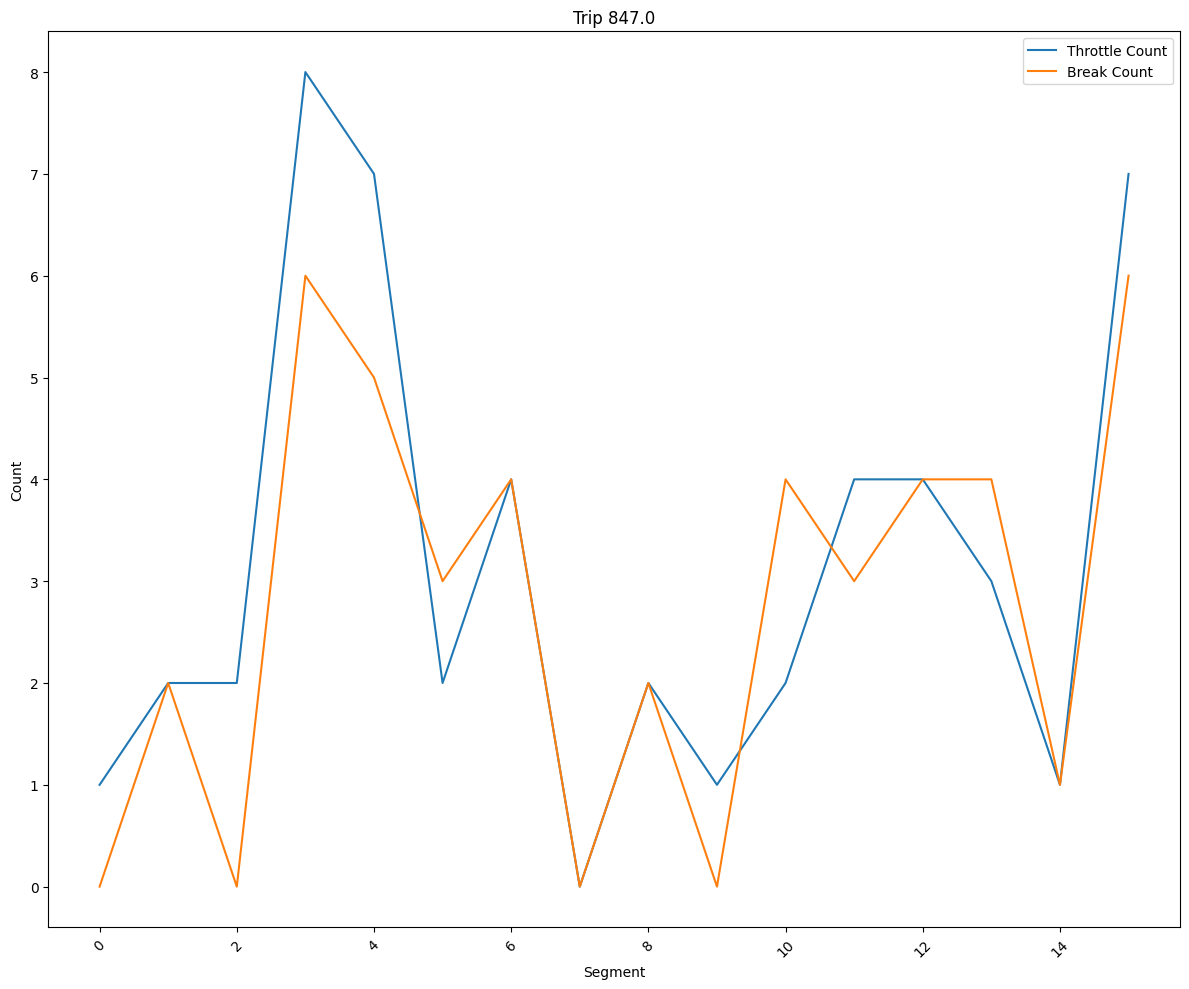

In [28]:
# drow two line graps fro trip id 847.0 showing the segment vs throttle_count and segment vs break_count
# Assuming 'segment_maxima_minima_counts' is your DataFrame
df1 = segment_maxima_minima_counts[(segment_maxima_minima_counts['trip_id'] == 847.0)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the data
ax.plot(df1['segment'], df1['throttle_count'], label='Throttle Count')
ax.plot(df1['segment'], df1['break_count'], label='Break Count')
ax.set_xlabel('Segment')
ax.set_ylabel('Count')
ax.set_title("Trip " + str(847.0))
ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Add a legend to the plot
ax.legend()

# Adjust layout for better formatting
plt.tight_layout()

# Show the plot
plt.show()

In [29]:
# get the number of unique trip ids
unique_trip_ids = segment_maxima_minima_counts['trip_id'].unique()
len(unique_trip_ids)

13574

In [30]:
# lef join means and segment_maxima_minima_counts on trip_id and segment
means_and_maxima_minima_counts = pd.merge(means, segment_maxima_minima_counts, on=['trip_id', 'segment'], how='left')

In [31]:
# load the DataOut\bus_running_times_feature_added_all_moddedDF.csv csv file
bus_running_times_feature_added_all_moddedDF = pd.read_csv('../DataOut/bus_running_times_feature_added_all_moddedDF.csv')
bus_running_times_feature_added_all_moddedDF

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1)
0,4890.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,0 days 00:01:09,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
1,4890.0,262.0,1.0,2.0,2021-10-01,06:42:12,06:45:42,0 days 00:03:30,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,74.0
2,4890.0,262.0,1.0,3.0,2021-10-01,06:45:42,06:53:58,0 days 00:08:16,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
3,4890.0,262.0,1.0,4.0,2021-10-01,06:54:04,06:57:19,0 days 00:03:15,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,6.0
4,4890.0,262.0,1.0,5.0,2021-10-01,06:57:19,06:58:56,0 days 00:01:37,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197627,3462.0,123.0,2.0,28.0,2022-10-31,18:45:44,18:47:23,0:01:39,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,9.0
197628,3462.0,123.0,2.0,29.0,2022-10-31,18:47:38,18:50:23,0:02:45,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0
197629,3462.0,123.0,2.0,30.0,2022-10-31,18:50:56,18:56:33,0:05:37,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,33.0
197630,3462.0,123.0,2.0,31.0,2022-10-31,18:56:48,18:57:34,0:00:46,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0


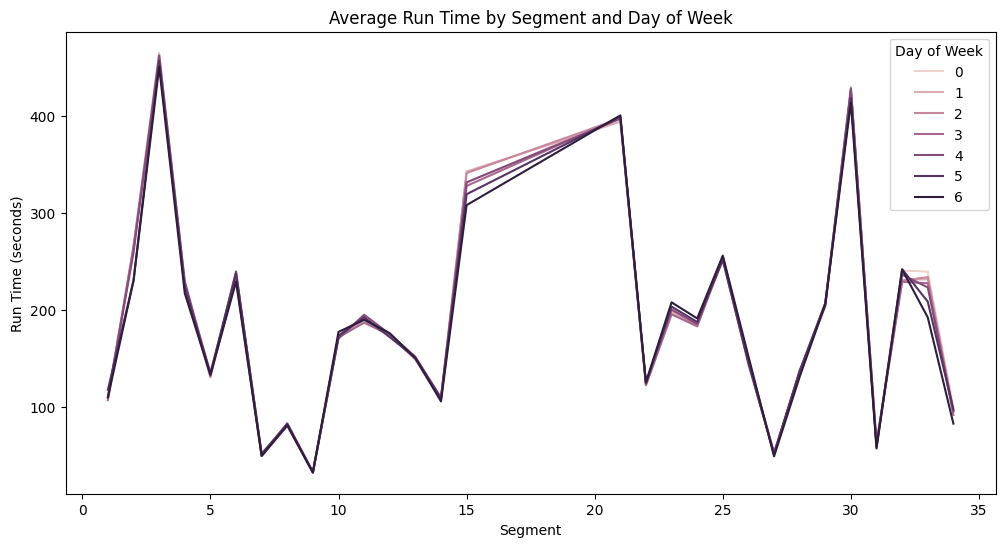

In [32]:
# grop bus_running_times_feature_added_all_moddedDF dataframe by segment and day_of_week and take the mean of run_time_in_seconds
grp_by_day_0f_week = bus_running_times_feature_added_all_moddedDF.groupby(['segment', 'day_of_week'])['run_time_in_seconds'].mean().reset_index()

# plot grp_by_day_0f_week dataframe in a line graph taking segment as x axis and run_time_in_seconds as y axis and day_of_week as hue
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already grouped your DataFrame as grp_by_day_0f_week
# If not, you can use your existing code to create it

# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=grp_by_day_0f_week, x='segment', y='run_time_in_seconds', hue='day_of_week')

# Set plot labels and title
plt.xlabel('Segment')
plt.ylabel('Run Time (seconds)')
plt.title('Average Run Time by Segment and Day of Week')

# Show the legend
plt.legend(title='Day of Week')

# Show the plot
plt.show()


In [33]:
means_and_maxima_minima_counts

,trip_id,segment,deviceid_x,speed,acceleration,radial_acceleration,deviceid_y,throttle_count,break_count
0,1.0,0,116.0,1.208475,0.070280,0.017025,116,4,0
1,1.0,21,116.0,14.518853,-0.189485,1.359669,116,6,5
2,1.0,22,116.0,20.698367,-0.391683,1.134855,116,1,2
3,1.0,23,116.0,12.222668,0.000099,0.487629,116,3,3
4,1.0,24,116.0,9.584235,0.008999,0.471313,116,3,4
...,...,...,...,...,...,...,...,...,...
207381,15891.0,11,1719.0,18.699291,-0.152594,3.907671,1719,35,35
207382,15891.0,12,1719.0,16.473428,-0.152041,2.910918,1719,33,35
207383,15891.0,13,1719.0,17.021033,-0.189728,3.823469,1719,35,37
207384,15891.0,14,1719.0,10.994308,-0.172396,2.093276,1719,24,26


In [34]:
means

,trip_id,segment,deviceid,speed,acceleration,radial_acceleration
0,1.0,0,116.0,1.208475,0.070280,0.017025
1,1.0,21,116.0,14.518853,-0.189485,1.359669
2,1.0,22,116.0,20.698367,-0.391683,1.134855
3,1.0,23,116.0,12.222668,0.000099,0.487629
4,1.0,24,116.0,9.584235,0.008999,0.471313
...,...,...,...,...,...,...
207381,15891.0,11,1719.0,18.699291,-0.152594,3.907671
207382,15891.0,12,1719.0,16.473428,-0.152041,2.910918
207383,15891.0,13,1719.0,17.021033,-0.189728,3.823469
207384,15891.0,14,1719.0,10.994308,-0.172396,2.093276


In [35]:
# get the number of unique trip ids
unique_trip_ids = means['trip_id'].unique()
len(unique_trip_ids)

13574

In [36]:
# print a list of unique trip ids
trip_ids = means_and_maxima_minima_counts['trip_id'].unique()
# convert the list values to int
trip_ids = [int(x) for x in trip_ids]
print('unique trip ids: {}'.format(trip_ids))
# print length
print('length of unique trip ids: {}'.format(len(trip_ids)))

unique trip ids: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 225, 226, 227, 228, 229, 230, 2

In [37]:
# save csv file
means_and_maxima_minima_counts.to_csv('../DataOut/means_and_maxima_minima_counts.csv',index=False)

In [38]:
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,count,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
0,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),0,2.0,1,207,0.323975,0.000000,0.000000,NaN,NaN,0.000000
1,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),0,2.0,1,207,-0.251980,1.278067,123.738485,0 days 00:00:15,-0.575955,-0.038397
2,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),0,2.0,1,207,-0.179987,0.722300,163.044397,0 days 00:00:15,0.071993,0.004800
3,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),0,2.0,1,207,-0.251980,0.048332,211.472339,0 days 00:00:15,-0.071993,-0.004800
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,207,0.359971,1.052222,287.492821,0 days 00:00:15,0.611951,0.040797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034419,898915939,1719,2022-02-25 16:47:53,7.291572,80.635452,2.15983,2022-02-25,16:47:53,POINT (184732.927692229 232154.67833579454),0,15890.0,2,1561,0.215983,0.714925,16242.694984,0 days 00:00:10,2.105833,0.210583
4034420,898916182,1719,2022-02-25 16:47:57,7.291587,80.635355,2.15983,2022-02-25,16:47:57,POINT (184722.26205350138 232156.3402929157),0,15890.0,2,1561,0.000000,0.003500,16253.479312,0 days 00:00:04,-0.215983,-0.053996
4034421,898917152,1719,2022-02-25 16:48:02,7.291597,80.635293,3.77970,2022-02-25,16:48:02,POINT (184715.44974995626 232157.44817551947),0,15890.0,2,1561,0.323974,1.320196,16260.374802,0 days 00:00:05,0.323974,0.064795
4034422,898917150,1719,2022-02-25 16:48:03,7.291605,80.635280,3.77970,2022-02-25,16:48:03,POINT (184713.9815042613 232158.37751184579),0,15890.0,2,1561,0.000000,0.128080,16262.113859,0 days 00:00:01,-0.323974,-0.323974


In [39]:
# get the last devicetime for each trip id from data datafraem
devicetime_for_each_trip_id = data.groupby(['trip_id'])['devicetime'].max().reset_index()
devicetime_for_each_trip_id

,trip_id,devicetime
0,1.0,2021-10-16 07:53:04
1,2.0,2021-10-16 08:53:48
2,3.0,2021-10-16 11:44:43
3,4.0,2021-10-16 13:18:33
4,5.0,2021-10-16 15:07:05
...,...,...
13569,15887.0,2022-02-25 10:34:59
13570,15888.0,2022-02-25 13:15:43
13571,15889.0,2022-02-25 14:38:03
13572,15890.0,2022-02-25 16:48:05


In [40]:
import pandas as pd

# Assuming 'devicetime' column is a string in the format 'YYYY-MM-DD HH:mm:ss'
# If it's not, adjust the format accordingly

# Convert 'devicetime' to a datetime data type
devicetime_for_each_trip_id['devicetime'] = pd.to_datetime(devicetime_for_each_trip_id['devicetime'])

# Create a new 'time_of_day' column based on the time component
devicetime_for_each_trip_id['time_of_day'] = pd.cut(
    devicetime_for_each_trip_id['devicetime'].dt.hour,
    bins=[0, 6, 19, 24],
    labels=['morning', 'day', 'night'],
    include_lowest=True
)

# Now, 'time_of_day' will be 'morning' for times before 6:00 AM,
# 'day' for times between 6:00 AM and 7:00 PM, and 'night' for times after 7:00 PM


In [41]:
devicetime_for_each_trip_id

,trip_id,devicetime,time_of_day
0,1.0,2021-10-16 07:53:04,day
1,2.0,2021-10-16 08:53:48,day
2,3.0,2021-10-16 11:44:43,day
3,4.0,2021-10-16 13:18:33,day
4,5.0,2021-10-16 15:07:05,day
...,...,...,...
13569,15887.0,2022-02-25 10:34:59,day
13570,15888.0,2022-02-25 13:15:43,day
13571,15889.0,2022-02-25 14:38:03,day
13572,15890.0,2022-02-25 16:48:05,day


In [42]:
# create a dataframe with only trip ids with devicetime before '2022-11-01'
devicetime_for_each_trip_id = devicetime_for_each_trip_id[devicetime_for_each_trip_id['devicetime'] < '2022-11-01']
devicetime_for_each_trip_id

,trip_id,devicetime,time_of_day
0,1.0,2021-10-16 07:53:04,day
1,2.0,2021-10-16 08:53:48,day
2,3.0,2021-10-16 11:44:43,day
3,4.0,2021-10-16 13:18:33,day
4,5.0,2021-10-16 15:07:05,day
...,...,...,...
13569,15887.0,2022-02-25 10:34:59,day
13570,15888.0,2022-02-25 13:15:43,day
13571,15889.0,2022-02-25 14:38:03,day
13572,15890.0,2022-02-25 16:48:05,day


In [43]:
means_and_maxima_minima_counts

,trip_id,segment,deviceid_x,speed,acceleration,radial_acceleration,deviceid_y,throttle_count,break_count
0,1.0,0,116.0,1.208475,0.070280,0.017025,116,4,0
1,1.0,21,116.0,14.518853,-0.189485,1.359669,116,6,5
2,1.0,22,116.0,20.698367,-0.391683,1.134855,116,1,2
3,1.0,23,116.0,12.222668,0.000099,0.487629,116,3,3
4,1.0,24,116.0,9.584235,0.008999,0.471313,116,3,4
...,...,...,...,...,...,...,...,...,...
207381,15891.0,11,1719.0,18.699291,-0.152594,3.907671,1719,35,35
207382,15891.0,12,1719.0,16.473428,-0.152041,2.910918,1719,33,35
207383,15891.0,13,1719.0,17.021033,-0.189728,3.823469,1719,35,37
207384,15891.0,14,1719.0,10.994308,-0.172396,2.093276,1719,24,26


In [44]:
# add time_of_day column to means_and_maxima_minima_counts dataframe using trip_id
means_and_maxima_minima_counts_with_time_of_day = pd.merge(means_and_maxima_minima_counts, devicetime_for_each_trip_id, on=['trip_id'], how='left')

In [45]:
# drop devicetime and deviceid_y columns, and rename deviceid_x to deviceid
means_and_maxima_minima_counts_with_time_of_day = means_and_maxima_minima_counts_with_time_of_day.drop(columns=['devicetime', 'deviceid_y'])
means_and_maxima_minima_counts_with_time_of_day = means_and_maxima_minima_counts_with_time_of_day.rename(columns={'deviceid_x': 'deviceid'})


In [46]:
means_and_maxima_minima_counts_with_time_of_day

,trip_id,segment,deviceid,speed,acceleration,radial_acceleration,throttle_count,break_count,time_of_day
0,1.0,0,116.0,1.208475,0.070280,0.017025,4,0,day
1,1.0,21,116.0,14.518853,-0.189485,1.359669,6,5,day
2,1.0,22,116.0,20.698367,-0.391683,1.134855,1,2,day
3,1.0,23,116.0,12.222668,0.000099,0.487629,3,3,day
4,1.0,24,116.0,9.584235,0.008999,0.471313,3,4,day
...,...,...,...,...,...,...,...,...,...
207381,15891.0,11,1719.0,18.699291,-0.152594,3.907671,35,35,day
207382,15891.0,12,1719.0,16.473428,-0.152041,2.910918,33,35,day
207383,15891.0,13,1719.0,17.021033,-0.189728,3.823469,35,37,day
207384,15891.0,14,1719.0,10.994308,-0.172396,2.093276,24,26,day


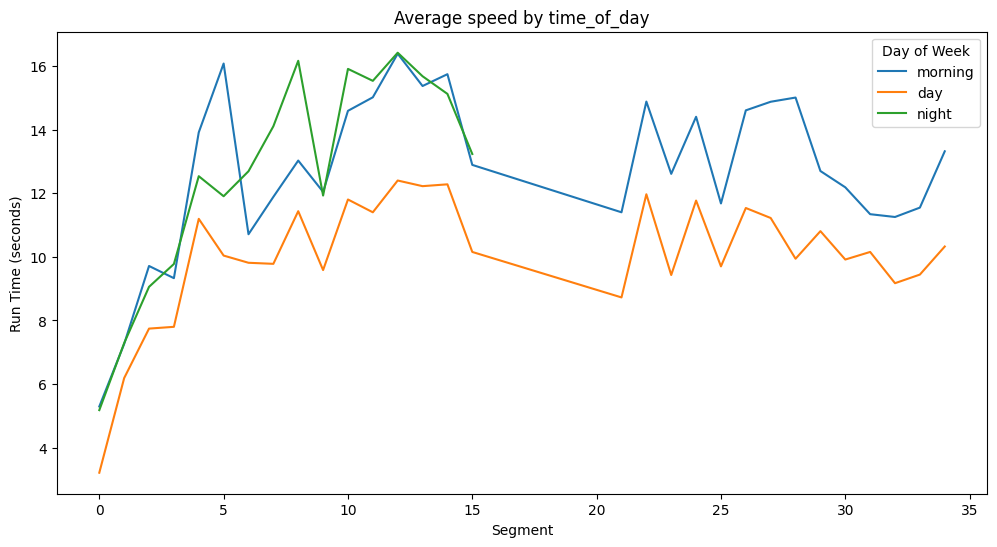

In [47]:
# grop bus_running_times_feature_added_all_moddedDF dataframe by segment and day_of_week and take the mean of run_time_in_seconds
grp_by_time_of_day = means_and_maxima_minima_counts_with_time_of_day.groupby(['segment', 'time_of_day'])['speed'].mean().reset_index()

# plot grp_by_day_0f_week dataframe in a line graph taking segment as x axis and run_time_in_seconds as y axis and day_of_week as hue
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already grouped your DataFrame as grp_by_time_of_day
# If not, you can use your existing code to create it

# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=grp_by_time_of_day, x='segment', y='speed', hue='time_of_day')

# Set plot labels and title
plt.xlabel('Segment')
plt.ylabel('Run Time (seconds)')
plt.title('Average speed by time_of_day')

# Show the legend
plt.legend(title='Day of Week')

# Show the plot
plt.show()


In [48]:
# left join time_of_day from means_and_maxima_minima_counts_with_time_of_day to bus_running_times_feature_added_all_moddedDF on trip_id and segment
bus_running_times_feature_added_all_moddedDF_tod = pd.merge(bus_running_times_feature_added_all_moddedDF, means_and_maxima_minima_counts_with_time_of_day[['trip_id', 'segment', 'time_of_day']], on=['trip_id', 'segment'], how='left')
bus_running_times_feature_added_all_moddedDF_tod.dropna(inplace=True)
bus_running_times_feature_added_all_moddedDF_tod

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day_x,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1),time_of_day_y
0,4890.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,0 days 00:01:09,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0,day
1,4890.0,262.0,1.0,2.0,2021-10-01,06:42:12,06:45:42,0 days 00:03:30,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,74.0,day
2,4890.0,262.0,1.0,3.0,2021-10-01,06:45:42,06:53:58,0 days 00:08:16,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0,day
3,4890.0,262.0,1.0,4.0,2021-10-01,06:54:04,06:57:19,0 days 00:03:15,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,6.0,day
4,4890.0,262.0,1.0,5.0,2021-10-01,06:57:19,06:58:56,0 days 00:01:37,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0,day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197627,3462.0,123.0,2.0,28.0,2022-10-31,18:45:44,18:47:23,0:01:39,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,9.0,day
197628,3462.0,123.0,2.0,29.0,2022-10-31,18:47:38,18:50:23,0:02:45,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0,day
197629,3462.0,123.0,2.0,30.0,2022-10-31,18:50:56,18:56:33,0:05:37,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,33.0,day
197630,3462.0,123.0,2.0,31.0,2022-10-31,18:56:48,18:57:34,0:00:46,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0,day


## trying a regression model

In [91]:
# combine bus_running_times_feature_added_all_moddedDF_tod with means_and_maxima_minima_counts_with_time_of_day on trip_id,deviceid and segment
df_for_speed_pred = pd.merge(bus_running_times_feature_added_all_moddedDF_tod, means_and_maxima_minima_counts_with_time_of_day, on=['trip_id', 'deviceid', 'segment'], how='left')

# only get the direction 1
df_for_speed_pred = df_for_speed_pred[df_for_speed_pred['direction']==1]
df_for_speed_pred

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day_x,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1),time_of_day_y,speed,acceleration,radial_acceleration,throttle_count,break_count,time_of_day
0,4890.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,0 days 00:01:09,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0,day,10.475160,-0.182385,0.823389,1,2,day
1,4890.0,262.0,1.0,2.0,2021-10-01,06:42:12,06:45:42,0 days 00:03:30,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,74.0,day,7.991364,0.023998,0.625240,3,1,day
2,4890.0,262.0,1.0,3.0,2021-10-01,06:45:42,06:53:58,0 days 00:08:16,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0,day,7.590256,-0.037141,0.502044,7,6,day
3,4890.0,262.0,1.0,4.0,2021-10-01,06:54:04,06:57:19,0 days 00:03:15,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,6.0,day,14.463141,0.098992,0.410159,2,1,day
4,4890.0,262.0,1.0,5.0,2021-10-01,06:57:19,06:58:56,0 days 00:01:37,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0,day,13.267504,-0.265204,0.411843,0,0,day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166159,11205.0,513.0,1.0,11.0,2022-10-31,18:38:46,18:41:11,0:02:25,145.0,1.1000,0.0,18.50,0.0,0,1,42.0,144.0,174.0,144.0,179.0,242.0,191.0,34.0,84.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0,day,12.320845,0.212577,0.447558,2,2,day
166160,11205.0,513.0,1.0,12.0,2022-10-31,18:41:11,18:43:37,0:02:26,146.0,1.3100,0.0,18.50,0.0,0,1,42.0,154.0,148.0,154.0,184.0,142.0,145.0,191.0,34.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,0.0,day,15.266061,-0.303463,0.978736,3,3,day
166161,11205.0,513.0,1.0,13.0,2022-10-31,18:43:44,18:46:13,0:02:29,149.0,1.1500,0.0,18.50,0.0,0,1,42.0,137.0,144.0,137.0,149.0,125.0,146.0,145.0,191.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,7.0,day,9.052223,-0.771379,0.459175,3,3,day
166162,11205.0,513.0,1.0,14.0,2022-10-31,18:46:28,18:47:48,0:01:20,80.0,0.8900,0.0,18.75,0.0,0,1,42.0,102.0,102.0,102.0,121.0,335.0,149.0,146.0,145.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0,day,14.887376,-0.470066,0.764378,1,0,day


In [92]:
# lable encode time_of_day_y column
df_for_speed_pred.rename(columns={'time_of_day_y': 'dayparts'}, inplace=True)
# Create a new 'time_of_day' column based on the time component
df_for_speed_pred['dayparts'] = pd.cut(
    df_for_speed_pred['hour_of_day'],
    bins=[0, 6, 19, 24],
    labels=[0, 1, 2],
    include_lowest=True
)


In [93]:
df_for_speed_pred.drop(columns=['time_of_day'], inplace=True)
df_for_speed_pred

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day_x,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1),dayparts,speed,acceleration,radial_acceleration,throttle_count,break_count
0,4890.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,0 days 00:01:09,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0,0,10.475160,-0.182385,0.823389,1,2
1,4890.0,262.0,1.0,2.0,2021-10-01,06:42:12,06:45:42,0 days 00:03:30,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,74.0,0,7.991364,0.023998,0.625240,3,1
2,4890.0,262.0,1.0,3.0,2021-10-01,06:45:42,06:53:58,0 days 00:08:16,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0,0,7.590256,-0.037141,0.502044,7,6
3,4890.0,262.0,1.0,4.0,2021-10-01,06:54:04,06:57:19,0 days 00:03:15,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,6.0,0,14.463141,0.098992,0.410159,2,1
4,4890.0,262.0,1.0,5.0,2021-10-01,06:57:19,06:58:56,0 days 00:01:37,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0,0,13.267504,-0.265204,0.411843,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166159,11205.0,513.0,1.0,11.0,2022-10-31,18:38:46,18:41:11,0:02:25,145.0,1.1000,0.0,18.50,0.0,0,1,42.0,144.0,174.0,144.0,179.0,242.0,191.0,34.0,84.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0,1,12.320845,0.212577,0.447558,2,2
166160,11205.0,513.0,1.0,12.0,2022-10-31,18:41:11,18:43:37,0:02:26,146.0,1.3100,0.0,18.50,0.0,0,1,42.0,154.0,148.0,154.0,184.0,142.0,145.0,191.0,34.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,0.0,1,15.266061,-0.303463,0.978736,3,3
166161,11205.0,513.0,1.0,13.0,2022-10-31,18:43:44,18:46:13,0:02:29,149.0,1.1500,0.0,18.50,0.0,0,1,42.0,137.0,144.0,137.0,149.0,125.0,146.0,145.0,191.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,7.0,1,9.052223,-0.771379,0.459175,3,3
166162,11205.0,513.0,1.0,14.0,2022-10-31,18:46:28,18:47:48,0:01:20,80.0,0.8900,0.0,18.75,0.0,0,1,42.0,102.0,102.0,102.0,121.0,335.0,149.0,146.0,145.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0,1,14.887376,-0.470066,0.764378,1,0


In [94]:
# get the type of dayparts column
df_for_speed_pred['dayparts'].dtypes

# convert it to int type
df_for_speed_pred['dayparts'] = df_for_speed_pred['dayparts'].astype(int)

In [95]:
def prepare(df):
    df['date'] = pd.to_datetime(df['date'])
    df['start_time'] = pd.to_datetime(df['start_time'],
                                    format='%H:%M:%S').dt.time

    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day

    df.drop(['run_time'], axis=1,inplace = True)
    df.drop(['end_time'], axis=1,inplace = True)

    #replace ' partially cloudy' with 'partially cloudy'
    df['conditions'] = df['conditions'].replace(' Partially cloudy', 'Partially cloudy')


    from sklearn.preprocessing import OrdinalEncoder

    # Replace NaN values in the 'conditions' column with 'Unknown'
    df['conditions'].fillna('Unknown', inplace=True)

    conditions = ['Rain', 'Rain, Overcast', 'Rain, Partially cloudy', 'Overcast', 'Partially cloudy', 'Clear','Unknown']
    encoder = OrdinalEncoder(categories=[conditions])
    df['conditions_encoded'] = encoder.fit_transform(df[['conditions']])

    # Now, you can drop the original 'conditions' column if needed
    df = df.drop(['conditions'], axis=1)

    df['start_float'] = df['start_time'].apply(lambda x: x.hour + x.minute/60.0 + x.second/3600.0)

    # drop 
    df = df.drop(['start_time'], axis=1)

    # Drop the original date column
    df.drop('date', axis=1, inplace=True)
    
    return df

df_for_speed_pred=prepare(df_for_speed_pred)
df_for_speed_pred

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day_x,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),dayparts,speed,acceleration,radial_acceleration,throttle_count,break_count,year,conditions_encoded,start_float
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.0,6.1,0.0,0,10.475160,-0.182385,0.823389,1,2,2021,4.0,6.663611
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.0,6.1,74.0,0,7.991364,0.023998,0.625240,3,1,2021,4.0,6.703333
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.0,6.1,0.0,0,7.590256,-0.037141,0.502044,7,6,2021,4.0,6.761667
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.0,6.1,6.0,0,14.463141,0.098992,0.410159,2,1,2021,4.0,6.901111
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.0,6.1,0.0,0,13.267504,-0.265204,0.411843,0,0,2021,4.0,6.955278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166159,11205.0,513.0,1.0,11.0,145.0,1.1000,0.0,18.50,0.0,0,1,42.0,144.0,174.0,144.0,179.0,242.0,191.0,34.0,84.0,18.0,31,10,22.2,0.0,4.3,15.0,1,12.320845,0.212577,0.447558,2,2,2022,4.0,18.646111
166160,11205.0,513.0,1.0,12.0,146.0,1.3100,0.0,18.50,0.0,0,1,42.0,154.0,148.0,154.0,184.0,142.0,145.0,191.0,34.0,18.0,31,10,22.2,0.0,4.3,0.0,1,15.266061,-0.303463,0.978736,3,3,2022,4.0,18.686389
166161,11205.0,513.0,1.0,13.0,149.0,1.1500,0.0,18.50,0.0,0,1,42.0,137.0,144.0,137.0,149.0,125.0,146.0,145.0,191.0,18.0,31,10,22.2,0.0,4.3,7.0,1,9.052223,-0.771379,0.459175,3,3,2022,4.0,18.728889
166162,11205.0,513.0,1.0,14.0,80.0,0.8900,0.0,18.75,0.0,0,1,42.0,102.0,102.0,102.0,121.0,335.0,149.0,146.0,145.0,18.0,31,10,22.2,0.0,4.3,15.0,1,14.887376,-0.470066,0.764378,1,0,2022,4.0,18.774444


In [108]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_rmse_dict = {}

df=df_for_speed_pred

# Split the data into two sets based on the week number for Code Block 1
test_data = df[df['week_no'].isin([39, 40, 41, 42])]
train_data = df[~df['week_no'].isin([39, 40, 41, 42])]

drop_for_train = ['run_time_in_seconds','speed','acceleration','radial_acceleration','throttle_count','break_count']

X_train, X_test = train_data.drop(drop_for_train, axis=1), test_data.drop(drop_for_train, axis=1)
y_train, y_test = train_data['speed'], test_data['speed']

# print(X_test)
print(type(X_test))


# Initialize XGBoost regressor for Code Block 1
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)

# Train the model on the training data for Code Block 1
model.fit(X_train, y_train)

# Make predictions on the testing data for Code Block 1
predictions = model.predict(X_test)

    # Create a copy of the test data and add predicted values for Code Block 2
predicted_df = test_data.copy()
predicted_df['predicted_speed'] = predictions

# Evaluate the model's performance for Code Block 1
mae1 = mean_absolute_error(y_test, predictions)
rmse1 = np.sqrt(mean_squared_error(y_test, predictions))
mape1 = np.mean(np.abs((y_test - predictions) / y_test)) * 100



#  print all the results for Code Block 1
print('Mean Absolute Error:', mae1)
print('Root Mean Squared Error:', rmse1)
print('Mean Absolute Percentage Error:', mape1)



# return model, predictions, predicted_df, mae1, rmse1,mape1

<class 'pandas.core.frame.DataFrame'>
Mean Absolute Error: 1.6670221330473558
Root Mean Squared Error: 2.2900214135454124
Mean Absolute Percentage Error: 16.062070527025675


In [144]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

df=df_for_speed_pred

# Split the data into two sets based on the week number for Code Block 1
test_data = df[df['week_no'].isin([39, 40, 41, 42])]
train_data = df[~df['week_no'].isin([39, 40, 41, 42])]

drop_for_train = ['run_time_in_seconds','speed','acceleration','radial_acceleration','throttle_count','break_count']

X_train, X_test = train_data.drop(drop_for_train, axis=1), test_data.drop(drop_for_train, axis=1)
y_train, y_test = train_data['speed'], test_data['speed']

features = X_train

# Create a simple deep neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len(features.columns),)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='softmax'),
    tf.keras.layers.Dense(254, activation='relu'),
    tf.keras.layers.Dense(128, activation='softmax'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for speed prediction
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=250, batch_size=32, validation_split=0.2)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Print the evaluation metrics
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

# To save the model for later use
model.save('speed_prediction_model')

# To load the model later
loaded_model = tf.keras.models.load_model('speed_prediction_model')


Epoch 1/250
2267/2267 [==============================] - 16s 7ms/step - loss: 17.2030 - val_loss: 7.4614
Epoch 2/250
2267/2267 [==============================] - 14s 6ms/step - loss: 10.8862 - val_loss: 7.7122
Epoch 3/250
2267/2267 [==============================] - 14s 6ms/step - loss: 10.8871 - val_loss: 7.6026
Epoch 4/250
2267/2267 [==============================] - 14s 6ms/step - loss: 10.8859 - val_loss: 7.4687
Epoch 5/250
2267/2267 [==============================] - 14s 6ms/step - loss: 10.8887 - val_loss: 8.2338
Epoch 6/250
2267/2267 [==============================] - 14s 6ms/step - loss: 10.8838 - val_loss: 7.8406
Epoch 7/250
2267/2267 [==============================] - 14s 6ms/step - loss: 10.8876 - val_loss: 7.6258
Epoch 8/250
2267/2267 [==============================] - 14s 6ms/step - loss: 10.8847 - val_loss: 7.4755
Epoch 9/250
2267/2267 [==============================] - 14s 6ms/step - loss: 10.8905 - val_loss: 7.5514
Epoch 10/250
2267/2267 [==============================]

INFO:tensorflow:Assets written to: speed_prediction_model\assets


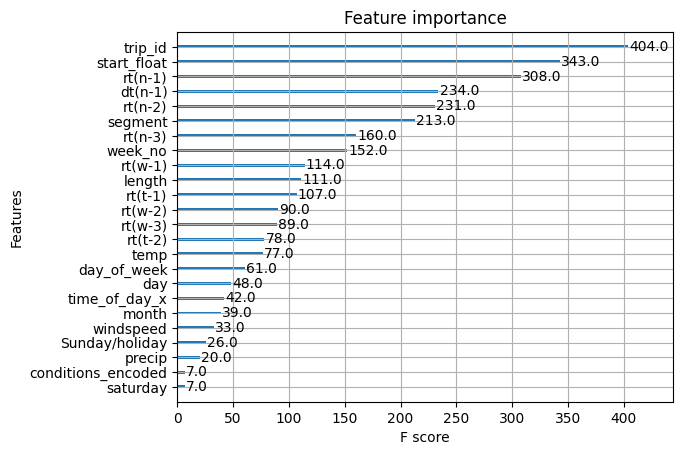

In [109]:
# plot feature importance for Code Block 1
xgb.plot_importance(model)
plt.show()


In [106]:
X_train

,trip_id,deviceid,direction,segment,length,day_of_week,time_of_day_x,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),dayparts,year,conditions_encoded,start_float
0,4890.0,262.0,1.0,1.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.0,6.1,0.0,0,2021,4.0,6.663611
1,4890.0,262.0,1.0,2.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.0,6.1,74.0,0,2021,4.0,6.703333
2,4890.0,262.0,1.0,3.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.0,6.1,0.0,0,2021,4.0,6.761667
3,4890.0,262.0,1.0,4.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.0,6.1,6.0,0,2021,4.0,6.901111
4,4890.0,262.0,1.0,5.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.0,6.1,0.0,0,2021,4.0,6.955278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156464,8954.0,279.0,1.0,11.0,1.1000,6.0,18.50,1.0,0,0,38.0,144.0,144.0,144.0,144.0,153.0,307.0,26.0,76.0,18.0,9,10,21.9,0.0,2.9,0.0,1,2022,3.0,18.730833
156465,8954.0,279.0,1.0,12.0,1.3100,6.0,18.75,1.0,0,0,38.0,165.0,165.0,165.0,144.0,160.0,119.0,307.0,26.0,18.0,9,10,21.9,0.0,2.9,15.0,1,2022,3.0,18.768056
156466,8954.0,279.0,1.0,13.0,1.1500,6.0,18.75,1.0,0,0,38.0,139.0,139.0,139.0,127.0,149.0,124.0,119.0,307.0,18.0,9,10,21.9,0.0,2.9,15.0,1,2022,3.0,18.806667
156467,8954.0,279.0,1.0,14.0,0.8900,6.0,18.75,1.0,0,0,38.0,102.0,102.0,102.0,88.0,86.0,98.0,124.0,119.0,18.0,9,10,21.9,0.0,2.9,0.0,1,2022,3.0,18.833889


In [136]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Assuming you have a DataFrame df_for_speed_pred with relevant columns
df = df_for_speed_pred

# Define the list of features to be predicted
features_to_predict = ['speed', 'acceleration', 'radial_acceleration', 'throttle_count', 'break_count']
drop_for_train = ['run_time_in_seconds','speed','acceleration','radial_acceleration','throttle_count','break_count','direction']

# Store the results in a dictionary
results = {}

# Split the data into two sets based on the week number
test_data = df[df['week_no'].isin([39, 40, 41, 42])]
train_data = df[~df['week_no'].isin([39, 40, 41, 42])]

#  Create a copy of the test data and add predicted values
predicted_df = test_data.copy()

for feature in features_to_predict:
    # drop_for_train = ['run_time_in_seconds'] + [col for col in features_to_predict if col != feature]

    # Split data into training and testing sets
    X_train, X_test = train_data.drop(drop_for_train, axis=1), test_data.drop(drop_for_train, axis=1)
    y_train, y_test = train_data[feature], test_data[feature]

    # Initialize XGBoost regressor
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    predictions = model.predict(X_test)

   
    predicted_df[f'predicted_{feature}'] = predictions

    # Evaluate the model's performance
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    results[feature] = {
        'mae': mae,
        'rmse': rmse,
        'mape': mape
    }

    # Print the results for the current feature
    print(f'Mean Absolute Error for {feature}:', mae)
    print(f'Root Mean Squared Error for {feature}:', rmse)
    print(f'Mean Absolute Percentage Error for {feature}:', mape)
    print('')

# You can access the results dictionary for each feature's error metrics
print(results)


Mean Absolute Error for speed: 1.6670221330473558
Root Mean Squared Error for speed: 2.2900214135454124
Mean Absolute Percentage Error for speed: 16.062070527025675

Mean Absolute Error for acceleration: 0.17805743960165954
Root Mean Squared Error for acceleration: 0.26610942656530473
Mean Absolute Percentage Error for acceleration: inf

Mean Absolute Error for radial_acceleration: 0.2622382033810107
Root Mean Squared Error for radial_acceleration: 0.7027204989740875
Mean Absolute Percentage Error for radial_acceleration: 33.11298048262068

Mean Absolute Error for throttle_count: 2.357303517860206
Root Mean Squared Error for throttle_count: 7.586944203365588
Mean Absolute Percentage Error for throttle_count: inf

Mean Absolute Error for break_count: 2.475838622374519
Root Mean Squared Error for break_count: 7.673643369669668
Mean Absolute Percentage Error for break_count: inf

{'speed': {'mae': 1.6670221330473558, 'rmse': 2.2900214135454124, 'mape': 16.062070527025675}, 'acceleration':

In [ ]:
# Mean Absolute Error for speed: 1.6670221330473558
# Root Mean Squared Error for speed: 2.2900214135454124
# Mean Absolute Percentage Error for speed: 16.062070527025675

# Mean Absolute Error for acceleration: 0.17805743960165954
# Root Mean Squared Error for acceleration: 0.26610942656530473
# Mean Absolute Percentage Error for acceleration: inf

# Mean Absolute Error for radial_acceleration: 0.2622382033810107
# Root Mean Squared Error for radial_acceleration: 0.7027204989740875
# Mean Absolute Percentage Error for radial_acceleration: 33.11298048262068

# Mean Absolute Error for throttle_count: 2.357303517860206
# Root Mean Squared Error for throttle_count: 7.586944203365588
# Mean Absolute Percentage Error for throttle_count: inf

# Mean Absolute Error for break_count: 2.475838622374519
# Root Mean Squared Error for break_count: 7.673643369669668
# Mean Absolute Percentage Error for break_count: inf

In [128]:
# predicted_df=predicted_df[['trip_id','deviceid','segment','speed','acceleration','radial_acceleration','throttle_count','break_count']]
predicted_df

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day_x,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),dayparts,speed,acceleration,radial_acceleration,throttle_count,break_count,year,conditions_encoded,start_float,predicted_speed,predicted_acceleration,predicted_radial_acceleration,predicted_throttle_count,predicted_break_count
156469,1511.0,117.0,1.0,1.0,75.0,0.63,0.0,6.50,0.0,0,1,39.0,130.0,100.0,113.0,113.0,113.0,113.0,113.0,113.0,6.0,10,10,19.7,0.0,4.0,0.0,0,7.289428,0.166108,0.085193,1,1,2022,4.0,6.510556,6.729597,-0.184531,0.351743,1.826059,1.643999
156470,1511.0,117.0,1.0,2.0,321.0,1.28,0.0,6.50,0.0,0,1,39.0,270.0,207.0,279.0,279.0,279.0,75.0,279.0,279.0,6.0,10,10,19.7,0.0,4.0,42.0,0,5.079595,0.066977,0.407187,8,8,2022,4.0,6.543056,7.415658,-0.080946,0.658715,4.261299,3.238336
156471,1511.0,117.0,1.0,3.0,523.0,2.11,0.0,6.50,0.0,0,1,39.0,537.0,480.0,445.0,487.0,487.0,321.0,75.0,487.0,6.0,10,10,19.7,0.0,4.0,15.0,0,5.926031,-0.292958,0.351097,12,13,2022,4.0,6.636389,7.360157,-0.148485,0.439542,11.206349,11.529557
156472,1511.0,117.0,1.0,4.0,211.0,1.55,0.0,6.75,0.0,0,1,39.0,201.0,197.0,209.0,209.0,209.0,523.0,321.0,75.0,6.0,10,10,19.7,0.0,4.0,68.0,0,9.378198,-0.225501,0.319080,4,5,2022,4.0,6.800556,11.023624,-0.105538,0.387669,4.435816,4.779848
156473,1511.0,117.0,1.0,5.0,123.0,0.84,0.0,6.75,0.0,0,1,39.0,108.0,100.0,130.0,130.0,130.0,211.0,523.0,321.0,6.0,10,10,19.7,0.0,4.0,0.0,0,8.835658,-0.451160,0.258226,3,3,2022,4.0,6.859167,9.983713,-0.438002,0.276172,2.255751,2.477726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166159,11205.0,513.0,1.0,11.0,145.0,1.10,0.0,18.50,0.0,0,1,42.0,144.0,174.0,144.0,179.0,242.0,191.0,34.0,84.0,18.0,31,10,22.2,0.0,4.3,15.0,1,12.320845,0.212577,0.447558,2,2,2022,4.0,18.646111,11.366772,-0.329005,0.613308,2.582891,3.205327
166160,11205.0,513.0,1.0,12.0,146.0,1.31,0.0,18.50,0.0,0,1,42.0,154.0,148.0,154.0,184.0,142.0,145.0,191.0,34.0,18.0,31,10,22.2,0.0,4.3,0.0,1,15.266061,-0.303463,0.978736,3,3,2022,4.0,18.686389,13.588639,-0.330403,1.024887,3.038249,3.063488
166161,11205.0,513.0,1.0,13.0,149.0,1.15,0.0,18.50,0.0,0,1,42.0,137.0,144.0,137.0,149.0,125.0,146.0,145.0,191.0,18.0,31,10,22.2,0.0,4.3,7.0,1,9.052223,-0.771379,0.459175,3,3,2022,4.0,18.728889,12.396024,-0.430812,0.953548,2.310758,2.798360
166162,11205.0,513.0,1.0,14.0,80.0,0.89,0.0,18.75,0.0,0,1,42.0,102.0,102.0,102.0,121.0,335.0,149.0,146.0,145.0,18.0,31,10,22.2,0.0,4.3,15.0,1,14.887376,-0.470066,0.764378,1,0,2022,4.0,18.774444,12.485658,-0.305001,0.723615,2.036743,2.486779


In [129]:
predicted_df=predicted_df[['trip_id','deviceid','segment','speed','acceleration','radial_acceleration','throttle_count','break_count','predicted_speed','predicted_acceleration','predicted_radial_acceleration','predicted_throttle_count','predicted_break_count']]
predicted_df

,trip_id,deviceid,segment,speed,acceleration,radial_acceleration,throttle_count,break_count,predicted_speed,predicted_acceleration,predicted_radial_acceleration,predicted_throttle_count,predicted_break_count
156469,1511.0,117.0,1.0,7.289428,0.166108,0.085193,1,1,6.729597,-0.184531,0.351743,1.826059,1.643999
156470,1511.0,117.0,2.0,5.079595,0.066977,0.407187,8,8,7.415658,-0.080946,0.658715,4.261299,3.238336
156471,1511.0,117.0,3.0,5.926031,-0.292958,0.351097,12,13,7.360157,-0.148485,0.439542,11.206349,11.529557
156472,1511.0,117.0,4.0,9.378198,-0.225501,0.319080,4,5,11.023624,-0.105538,0.387669,4.435816,4.779848
156473,1511.0,117.0,5.0,8.835658,-0.451160,0.258226,3,3,9.983713,-0.438002,0.276172,2.255751,2.477726
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166159,11205.0,513.0,11.0,12.320845,0.212577,0.447558,2,2,11.366772,-0.329005,0.613308,2.582891,3.205327
166160,11205.0,513.0,12.0,15.266061,-0.303463,0.978736,3,3,13.588639,-0.330403,1.024887,3.038249,3.063488
166161,11205.0,513.0,13.0,9.052223,-0.771379,0.459175,3,3,12.396024,-0.430812,0.953548,2.310758,2.798360
166162,11205.0,513.0,14.0,14.887376,-0.470066,0.764378,1,0,12.485658,-0.305001,0.723615,2.036743,2.486779


In [130]:
# get the needed features from the train data
train_data_needed_features = train_data[['trip_id','deviceid','segment','speed','acceleration','radial_acceleration','throttle_count','break_count']]

In [131]:
# combine train_data_needed_features and predicted_df
speed_and_features_predicted_for_test_data = pd.concat([train_data_needed_features, predicted_df])
speed_and_features_predicted_for_test_data

,trip_id,deviceid,segment,speed,acceleration,radial_acceleration,throttle_count,break_count,predicted_speed,predicted_acceleration,predicted_radial_acceleration,predicted_throttle_count,predicted_break_count
0,4890.0,262.0,1.0,10.475160,-0.182385,0.823389,1,2,NaN,NaN,NaN,NaN,NaN
1,4890.0,262.0,2.0,7.991364,0.023998,0.625240,3,1,NaN,NaN,NaN,NaN,NaN
2,4890.0,262.0,3.0,7.590256,-0.037141,0.502044,7,6,NaN,NaN,NaN,NaN,NaN
3,4890.0,262.0,4.0,14.463141,0.098992,0.410159,2,1,NaN,NaN,NaN,NaN,NaN
4,4890.0,262.0,5.0,13.267504,-0.265204,0.411843,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166159,11205.0,513.0,11.0,12.320845,0.212577,0.447558,2,2,11.366772,-0.329005,0.613308,2.582891,3.205327
166160,11205.0,513.0,12.0,15.266061,-0.303463,0.978736,3,3,13.588639,-0.330403,1.024887,3.038249,3.063488
166161,11205.0,513.0,13.0,9.052223,-0.771379,0.459175,3,3,12.396024,-0.430812,0.953548,2.310758,2.798360
166162,11205.0,513.0,14.0,14.887376,-0.470066,0.764378,1,0,12.485658,-0.305001,0.723615,2.036743,2.486779


In [132]:
# save the speed_and_features_predicted_for_test_data to a csv file
speed_and_features_predicted_for_test_data.to_csv('../DataOut/speed_and_features_predicted_for_test_data.csv',index=False)

In [49]:
bus_running_times_feature_added_all_moddedDF_tod

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day_x,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1),time_of_day_y
0,4890.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,0 days 00:01:09,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0,day
1,4890.0,262.0,1.0,2.0,2021-10-01,06:42:12,06:45:42,0 days 00:03:30,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,74.0,day
2,4890.0,262.0,1.0,3.0,2021-10-01,06:45:42,06:53:58,0 days 00:08:16,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0,day
3,4890.0,262.0,1.0,4.0,2021-10-01,06:54:04,06:57:19,0 days 00:03:15,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,6.0,day
4,4890.0,262.0,1.0,5.0,2021-10-01,06:57:19,06:58:56,0 days 00:01:37,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0,day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197627,3462.0,123.0,2.0,28.0,2022-10-31,18:45:44,18:47:23,0:01:39,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,9.0,day
197628,3462.0,123.0,2.0,29.0,2022-10-31,18:47:38,18:50:23,0:02:45,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0,day
197629,3462.0,123.0,2.0,30.0,2022-10-31,18:50:56,18:56:33,0:05:37,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,33.0,day
197630,3462.0,123.0,2.0,31.0,2022-10-31,18:56:48,18:57:34,0:00:46,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0,day


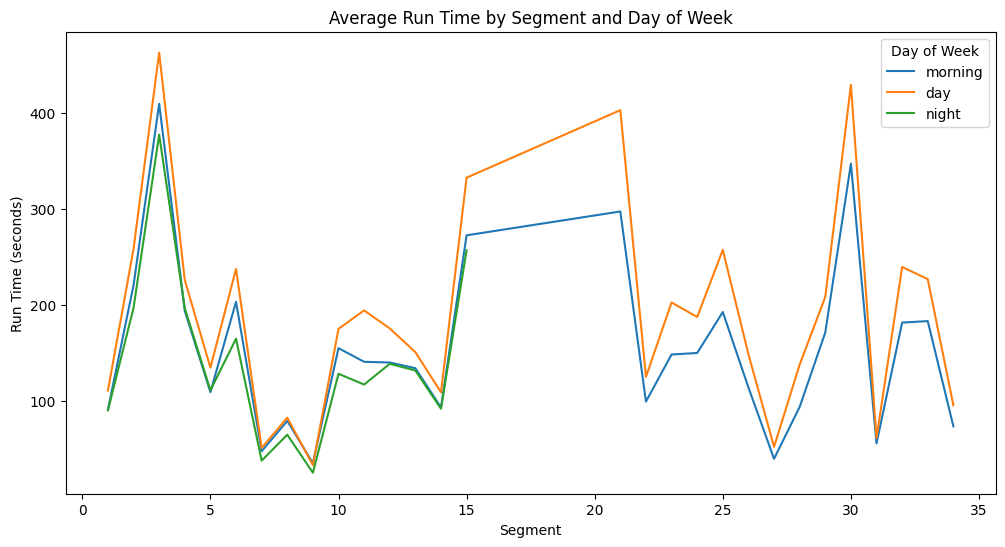

In [48]:
# grop bus_running_times_feature_added_all_moddedDF dataframe by segment and day_of_week and take the mean of run_time_in_seconds
grp_by_time_of_day = bus_running_times_feature_added_all_moddedDF_tod.groupby(['segment', 'time_of_day_y'])['run_time_in_seconds'].mean().reset_index()

# plot grp_by_time_of_day dataframe in a line graph taking segment as x axis and run_time_in_seconds as y axis and day_of_week as hue
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already grouped your DataFrame as grp_by_time_of_day
# If not, you can use your existing code to create it

# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=grp_by_time_of_day, x='segment', y='run_time_in_seconds', hue='time_of_day_y')

# Set plot labels and title
plt.xlabel('Segment')
plt.ylabel('Run Time (seconds)')
plt.title('Average Run Time by Segment and Day of Week')

# Show the legend
plt.legend(title='Day of Week')

# Show the plot
plt.show()

In [49]:
# i want to take the average of speed, acceleration, radial_acceleration, acceleration_der, throttle_count, break_count for each deviceid and time_of_day per each segment
# List of features you want to calculate the mean for
features_to_mean = ['speed', 'acceleration', 'radial_acceleration', 'throttle_count', 'break_count']  # Replace with your actual feature names
avg_for_devID_time_of_day_and_segment = means_and_maxima_minima_counts_with_time_of_day.groupby(['deviceid', 'time_of_day', 'segment'])[features_to_mean].mean().reset_index()



In [50]:
avg_for_devID_time_of_day_and_segment.head (50)

,deviceid,time_of_day,segment,speed,acceleration,radial_acceleration,throttle_count,break_count
0,116.0,morning,0,3.914116,-0.017456,0.265196,4.388889,2.555556
1,116.0,morning,1,NaN,NaN,NaN,NaN,NaN
2,116.0,morning,2,NaN,NaN,NaN,NaN,NaN
3,116.0,morning,3,NaN,NaN,NaN,NaN,NaN
4,116.0,morning,4,NaN,NaN,NaN,NaN,NaN
5,116.0,morning,5,NaN,NaN,NaN,NaN,NaN
6,116.0,morning,6,NaN,NaN,NaN,NaN,NaN
7,116.0,morning,7,NaN,NaN,NaN,NaN,NaN
8,116.0,morning,8,NaN,NaN,NaN,NaN,NaN
9,116.0,morning,9,NaN,NaN,NaN,NaN,NaN


In [51]:
import pandas as pd
import numpy as np

# List of features (columns) to consider for filling NaN values
features_to_fill = avg_for_devID_time_of_day_and_segment.columns.difference(['deviceid', 'time_of_day', 'segment'])

# Calculate the mean without considering 'time_of_day' for the selected features
for feature in features_to_fill:
    avg_for_devID_time_of_day_and_segment[feature] = avg_for_devID_time_of_day_and_segment.groupby(['deviceid', 'segment'])[feature].transform(lambda x: x.fillna(x.mean()))


In [52]:
avg_for_devID_time_of_day_and_segment.head (50)

,deviceid,time_of_day,segment,speed,acceleration,radial_acceleration,throttle_count,break_count
0,116.0,morning,0,3.914116,-0.017456,0.265196,4.388889,2.555556
1,116.0,morning,1,6.617755,-0.022759,0.354919,1.444820,1.453245
2,116.0,morning,2,8.190476,0.021226,0.536539,3.344290,1.696848
3,116.0,morning,3,9.379045,-0.009781,0.627968,7.637994,6.356376
4,116.0,morning,4,13.073141,-0.028369,0.431310,4.018528,3.886830
5,116.0,morning,5,12.410127,-0.089716,0.328919,2.261449,2.222918
6,116.0,morning,6,11.531481,-0.046558,0.782298,3.208134,3.481537
7,116.0,morning,7,12.259334,0.102294,0.325217,0.392344,0.538278
8,116.0,morning,8,14.816338,-0.039122,0.994696,0.891148,0.930622
9,116.0,morning,9,12.256518,-0.193391,0.458531,0.169076,0.322602


In [53]:
# save csv file
avg_for_devID_time_of_day_and_segment.to_csv('../DataOut/avg_for_devID_time_of_day_and_segment.csv',index=False)